In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/data sih.csv')
df

,School Wise,Area Wise,Gender Wise,Caste Wise,Age,Standards,Enrollment Year,Mother Occupation,Father Occupation,Monthly Income,Dropped out,Type,Health,Marital status,Displaced,Scholarship holder,NRI
0,Primary,Tamil Nadu,Male,General,7,7,1999,Teacher,Software Developer,75000,0,Private,Excellent,0,1,0,0
1,Secondary,Maharashtra,Female,SC,10,5,2004,Nurse,Banker,60000,1,Government,Good,0,1,0,0
2,Higher Secondary,Punjab,Male,ST,12,7,2005,Engineer,Mechanic,50565,1,Government,Excellent,1,1,0,0
3,Higher Secondary,Kerala,Female,OBC,14,9,2001,Accountant,Pharmacist,49598,1,Government,Excellent,0,1,0,0
4,Higher Secondary,Karnataka,Male,General,15,8,1998,Doctor,Architect,399000,1,Private,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Secondary,Tamil Nadu,Male,OBC,11,6,2001,Artist,Electrician,4758,1,Private,Excellent,1,1,1,0
379,Higher Secondary,Kerala,Female,SC,12,7,2001,Carpenter,Firefighter,7312,1,Private,Good,1,0,0,0
380,Secondary,Maharashtra,Male,OBC,12,8,1998,Homemaker,Mechanic,8544,1,Private,Excellent,1,0,0,0
381,Primary,Tamil Nadu,Female,SC,13,7,1999,Artist,Electrician,5987,1,Private,Good,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   School Wise         383 non-null    object
 1   Area Wise           383 non-null    object
 2   Gender Wise         383 non-null    object
 3   Caste Wise          383 non-null    object
 4   Age                 383 non-null    int64 
 5   Standards           383 non-null    int64 
 6   Enrollment Year     383 non-null    int64 
 7   Mother Occupation   383 non-null    object
 8   Father Occupation   383 non-null    object
 9   Monthly Income      383 non-null    int64 
 10  Dropped out         383 non-null    int64 
 11  Type                383 non-null    object
 12  Health              383 non-null    object
 13  Marital status      383 non-null    int64 
 14  Displaced           383 non-null    int64 
 15  Scholarship holder  383 non-null    int64 
 16  NRI                 383 no

In [ ]:
print(df.isnull().sum() / len(df) * 100)

School Wise           0.0
Area Wise             0.0
Gender Wise           0.0
Caste Wise            0.0
Age                   0.0
Standards             0.0
Enrollment Year       0.0
Mother Occupation     0.0
Father Occupation     0.0
Monthly Income        0.0
Dropped out           0.0
Type                  0.0
Health                0.0
Marital status        0.0
Displaced             0.0
Scholarship holder    0.0
NRI                   0.0
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-8-f08be3f5617f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


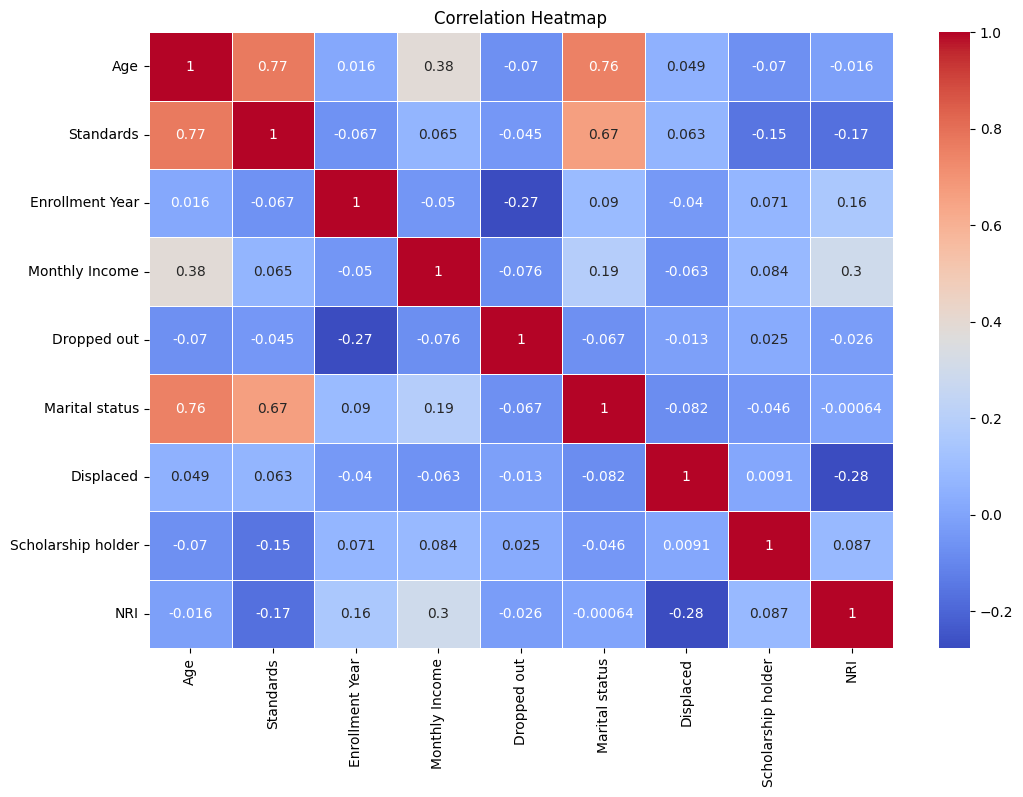

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
categorical_cols = ["School Wise", "Area Wise", "Gender Wise", "Caste Wise","Age","Monthly Income","Type","Health","Marital status","Displaced","Scholarship holder","NRI"]

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Define mappings for categorical columns
categorical_map = {}
for col in categorical_cols:
    label_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
    categorical_map[col] = label_map


In [ ]:
# Print the columns in the DataFrame
print(df.columns)

# Ensure that the column names match the case and spelling in your DataFrame
columns_to_drop = ['Father Occupation', 'Mother Occupation', 'Standards']

# Check if the columns exist in the DataFrame
missing_columns = [col for col in columns_to_drop if col not in df.columns]

# Print the missing columns
print("Missing columns:", missing_columns)

# Drop the specified columns if they exist
if not missing_columns:
    df = df.drop(columns=columns_to_drop)
else:
    print("Columns not found in the DataFrame.")


Index(['School Wise', 'Area Wise', 'Gender Wise', 'Caste Wise', 'Age',
       'Standards', 'Enrollment Year', 'Mother Occupation',
       'Father Occupation', 'Monthly Income', 'Dropped out', 'Type', 'Health',
       'Marital status', 'Displaced', 'Scholarship holder', 'NRI'],
      dtype='object')
Missing columns: []


In [ ]:
# Define input features and output variable
input_columns = ["School Wise", "Area Wise", "Gender Wise", "Caste Wise", "Age","Monthly Income","Type","Health","Marital status","Displaced","Scholarship holder","NRI"]

output_column = "Dropped out"
data = df[input_columns]
target = df[output_column]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



In [ ]:
# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(x_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.961038961038961
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.97      0.99      0.98        67

    accuracy                           0.96        77
   macro avg       0.93      0.89      0.91        77
weighted avg       0.96      0.96      0.96        77



In [ ]:
custom_labels = {
    "School Wise": {
        0: "Primary",
        1: "Secondary",
        2: "Higher Secondary",
    },
    "Area Wise": {
        0: "Andaman and Nicobar Islands",
    1: "Andhra Pradesh",
    2: "Arunachal Pradesh",
    3: "Assam",
    4: "Bihar",
    5: "Chandigarh",
    6: "Chhattisgarh",
    7: "Dadra and Nagar Haveli",
    8: "Daman and Diu",
    9: "Delhi",
    10: "Goa",
    11: "Gujarat",
    12: "Haryana",
    13: "Himachal Pradesh",
    14: "Jammu and Kashmir",
    15: "Jharkhand",
    16: "Karnataka",
    17: "Kerala",
    18: "Lakshadweep",
    19: "Madhya Pradesh",
    20: "Maharashtra",
    21: "Manipur",
    22: "Meghalaya",
    23: "Mizoram",
    24: "Nagaland",
    25: "Odisha",
    26: "Puducherry",
    27: "Punjab",
    28: "Rajasthan",
    29: "Sikkim",
    30: "Tamil Nadu",
    31: "Telangana",
    32: "Tripura",
    33: "Uttar Pradesh",
    34: "Uttarakhand",
    35: "West Bengal"
    },
    "Gender Wise": {
        0: "Male",
        1: "Female",
    },
    "Caste Wise": {
        0: "General",
        1: "SC",
        2: "ST",
        3: "OBC",
    },
    "Type": {
        0: "Private",
        1: "Government",
    },
    "Health": {
        0: "Excellent",
        1: "Good",
        2: "Fair",
    },
    "Marital status": {
        0: "No",
        1: "Yes",
    },
    "Displaced": {
        0: "No",
        1: "Yes",
    },
    "Scholarship holder": {
        0: "No",
        1: "Yes",
    },
    "NRI": {
        0: "No",
        1: "Yes",
    },
}

In [ ]:
print("\nPredict Dropout Status:")
input_features = []

for col in input_columns:
    response = input(f"Do you want to enter {col}? (yes/no): ").strip().lower()
    if response == "yes":
        if col in categorical_cols:
            if col in custom_labels:
                print(f"Possible options for {col}:")
                for option_key, custom_label in custom_labels[col].items():
                    print(f"{option_key} - {custom_label}")
                while True:
                    value = input(f"Enter {col}: ").strip()
                    # Map the selected label to the corresponding integer using custom labels
                    selected_option = None
                    for option_key, custom_label in custom_labels[col].items():
                        if value.lower() == custom_label.lower():
                            selected_option = option_key
                            break
                    if selected_option is not None:
                        input_features.append(selected_option)
                        break  # Exit the loop if a valid label is provided
                    else:
                        print("Invalid input. Please enter a valid label.")
            else:
                print(f"No custom labels defined for {col}.")
        else:
            value = input(f"Enter {col}: ").strip()
            input_features.append(value)

# Verify that the column 'Dropped out' exists in the DataFrame
if 'Dropped out' in data.columns:
    # Fit the label encoder on the entire categorical column data
    for col in categorical_cols:
        label_encoder.fit(data[col])

    # Encode categorical inputs and keep non-categorical columns as strings
    input_features_encoded = []
    for i, col in enumerate(input_columns):
        if col in categorical_cols:
            # Encode the input using the fitted LabelEncoder
            value_encoded = label_encoder.transform([input_features[i]])[0]
            input_features_encoded.append(value_encoded)
        else:
            # Keep non-categorical columns as strings
            input_features_encoded.append(input_features[i])
else:
    print("The column 'Dropped out' does not exist in the DataFrame.")



Predict Dropout Status:
Do you want to enter School Wise? (yes/no): yes
Possible options for School Wise:
0 - Primary
1 - Secondary
2 - Higher Secondary
Enter School Wise: Primary
Do you want to enter Area Wise? (yes/no): yes
Possible options for Area Wise:
0 - Andaman and Nicobar Islands
1 - Andhra Pradesh
2 - Arunachal Pradesh
3 - Assam
4 - Bihar
5 - Chandigarh
6 - Chhattisgarh
7 - Dadra and Nagar Haveli
8 - Daman and Diu
9 - Delhi
10 - Goa
11 - Gujarat
12 - Haryana
13 - Himachal Pradesh
14 - Jammu and Kashmir
15 - Jharkhand
16 - Karnataka
17 - Kerala
18 - Lakshadweep
19 - Madhya Pradesh
20 - Maharashtra
21 - Manipur
22 - Meghalaya
23 - Mizoram
24 - Nagaland
25 - Odisha
26 - Puducherry
27 - Punjab
28 - Rajasthan
29 - Sikkim
30 - Tamil Nadu
31 - Telangana
32 - Tripura
33 - Uttar Pradesh
34 - Uttarakhand
35 - West Bengal
Enter Area Wise: Delhi
Do you want to enter Gender Wise? (yes/no): yes
Possible options for Gender Wise:
0 - Male
1 - Female
Enter Gender Wise: Male
Do you want to en

In [ ]:
print(data.head())


   School Wise  Area Wise  Gender Wise  Caste Wise  Age  Monthly Income  Type  \
0            4         17            3           8    1              77     1   
1            5         13            2          10    4              76     0   
2            3         15            3          11    6              73     0   
3            3         11            2           9    8              71     0   
4            3         10            3           8    9              88     1   

   Health  Marital status  Displaced  Scholarship holder  NRI  
0       0               0          1                   0    0  
1       2               0          1                   0    0  
2       0               1          1                   0    0  
3       0               0          1                   0    0  
4       2               1          0                   0    0  


In [ ]:

import pandas as pd

# Get user input for the categorical features
school_wise = input("Is the student School Wise? (yes/no): ")
area_wise = input("Is the student Area Wise? (yes/no): ")
gender_wise = input("Is the student Gender Wise? (yes/no): ")
caste_wise = input("Is the student Caste Wise? (yes/no): ")
Type = input("Is the student in type of school? (yes/no): ")
health = input("Is the student health Wise? (yes/no): ")
marital_status = input("Is the student married? (yes/no): ")
displaced = input("Is the student Displaced? (yes/no): ")
scholarship_holder = input("Is the student a scholarship holder? (yes/no)")
nri = input("Is the student NRI? (yes/no): ")

# Get user input for age and monthly income
age = int(input("Enter the student's age: "))
monthly_income = int(input("Enter the student's monthly income: "))

# Convert user input to numerical values (assuming "yes" is 1 and "no" is 0)
school_wise = 1 if school_wise.lower() == 'yes' else 0
area_wise = 1 if area_wise.lower() == 'yes' else 0
gender_wise = 1 if gender_wise.lower() == 'yes' else 0
caste_wise = 1 if caste_wise.lower() == 'yes' else 0

# Create a DataFrame with the dynamically fetched values
input_features_encoded = pd.DataFrame({
    'School Wise': [school_wise],
    'Area Wise': [area_wise],
    'Gender Wise': [gender_wise],
    'Caste Wise': [caste_wise],
    'Age': [age],
    'Monthly Income': [monthly_income],
    'Type': [Type],
    'Health': [health],
    'Marital status': [marital_status],
    'Displaced': [displaced],
    'Scholarship holder': [scholarship_holder],
    'NRI': [nri],
})







Is the student School Wise? (yes/no): yes
Is the student Area Wise? (yes/no): yes
Is the student Gender Wise? (yes/no): yes
Is the student Caste Wise? (yes/no): yes
Is the student in type of school? (yes/no): yes
Is the student health Wise? (yes/no): yes
Is the student married? (yes/no): yes
Is the student Displaced? (yes/no): yes
Is the student a scholarship holder? (yes/no)yes
Is the student NRI? (yes/no): yes
Enter the student's age: 11
Enter the student's monthly income: 12546


In [ ]:
# Rest of your code for creating input_features_encoded DataFrame

# Convert 'yes' to 1 and 'no' to 0 for relevant columns
input_features_encoded['School Wise'] = 1 if school_wise == 'yes' else 0
input_features_encoded['Area Wise'] = 1 if area_wise == 'yes' else 0
input_features_encoded['Gender Wise'] = 1 if gender_wise == 'yes' else 0
input_features_encoded['Caste Wise'] = 1 if caste_wise == 'yes' else 0
input_features_encoded['Type'] = 1 if Type == 'yes' else 0
input_features_encoded['Health'] = 1 if health == 'yes' else 0
input_features_encoded['Marital status'] = 1 if marital_status == 'yes' else 0
input_features_encoded['Displaced'] = 1 if displaced == 'yes' else 0
input_features_encoded['Scholarship holder'] = 1 if scholarship_holder == 'yes' else 0
input_features_encoded['NRI'] = 1 if nri == 'yes' else 0

# Make predictions
predicted_dropout = clf.predict(input_features_encoded)

if predicted_dropout[0] == 1:
    print("The student is likely to drop out.")
else:
    print("The student is not likely to drop out.")


The student is likely to drop out.
